# Name: Munazza Gaoher


### SUBJECT : Data Science and Business Analytics.

# TASK6: Prediction using Decision Tree Algorithm (Level - Intermediate)

## Create the Decision Tree classifier and visualize it graphically.

### GRIP@TheSparkFoundation-  #GRIPApril21 

#### Decision Trees are versatile Machine Learning algorithms that can perform both classification and regression tasks, and even multioutput tasks.For the given ‘Iris’ dataset, I created the Decision Tree classifier and visualized it graphically. The purpose of this task is if we feed any new data to this classifier, it would be able to predict the right class accordingly.    

### 1.Importing the required Libraries

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
import sklearn.metrics as sm

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


###  2.Loading the Dataset

In [3]:
# Loading Dataset
iris = load_iris()
X=iris.data[:,:] 
y=iris.target

### 3.Exploratory Data Analysis 

In [5]:
#Input data 

data=pd.DataFrame(iris['data'],columns=["Petal length","Petal Width","Sepal Length","Sepal Width"])
data['Species']=iris['target']
data['Species']=data['Species'].apply(lambda x: iris['target_names'][x])

data.head()

,Petal length,Petal Width,Sepal Length,Sepal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
data.shape

(150, 5)

In [7]:
data.describe()

,Petal length,Petal Width,Sepal Length,Sepal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### 4.Data Visualization comparing various features

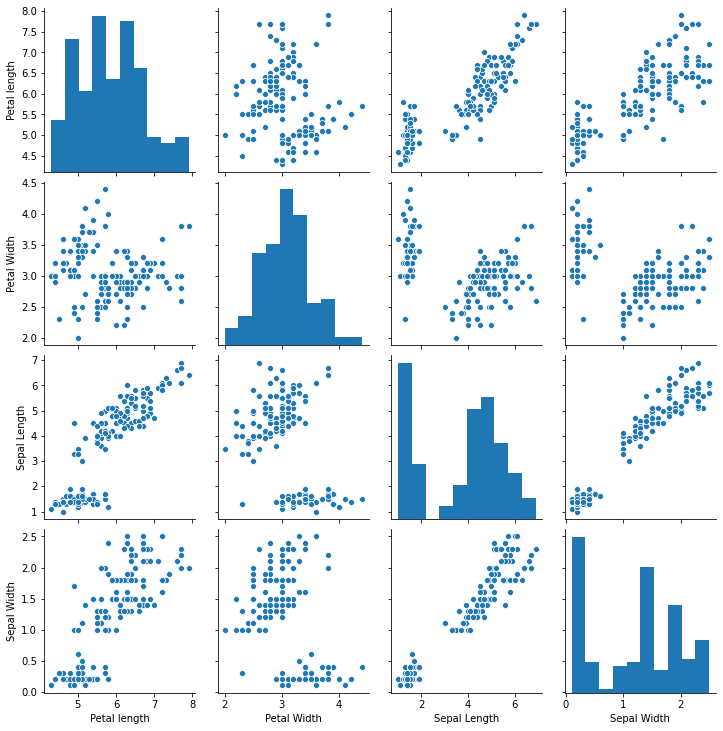

In [8]:
# Input data Visualization
sns.pairplot(data)

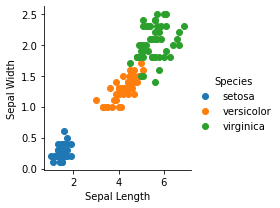

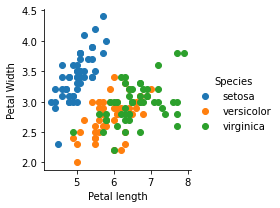

In [9]:
sns.FacetGrid(data,hue='Species').map(plt.scatter,'Sepal Length','Sepal Width').add_legend()
plt.show()

# Scatter plot of data based on Petal Length and Width features
sns.FacetGrid(data,hue='Species').map(plt.scatter,'Petal length','Petal Width').add_legend()
plt.show()

### 5.Splitting the data into Train and Test set

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0) 

In [12]:
X_train

array([[5.9, 3. , 4.2, 1.5],
       [5.8, 2.6, 4. , 1.2],
       [6.8, 3. , 5.5, 2.1],
       [4.7, 3.2, 1.3, 0.2],
       [6.9, 3.1, 5.1, 2.3],
       [5. , 3.5, 1.6, 0.6],
       [5.4, 3.7, 1.5, 0.2],
       [5. , 2. , 3.5, 1. ],
       [6.5, 3. , 5.5, 1.8],
       [6.7, 3.3, 5.7, 2.5],
       [6. , 2.2, 5. , 1.5],
       [6.7, 2.5, 5.8, 1.8],
       [5.6, 2.5, 3.9, 1.1],
       [7.7, 3. , 6.1, 2.3],
       [6.3, 3.3, 4.7, 1.6],
       [5.5, 2.4, 3.8, 1.1],
       [6.3, 2.7, 4.9, 1.8],
       [6.3, 2.8, 5.1, 1.5],
       [4.9, 2.5, 4.5, 1.7],
       [6.3, 2.5, 5. , 1.9],
       [7. , 3.2, 4.7, 1.4],
       [6.5, 3. , 5.2, 2. ],
       [6. , 3.4, 4.5, 1.6],
       [4.8, 3.1, 1.6, 0.2],
       [5.8, 2.7, 5.1, 1.9],
       [5.6, 2.7, 4.2, 1.3],
       [5.6, 2.9, 3.6, 1.3],
       [5.5, 2.5, 4. , 1.3],
       [6.1, 3. , 4.6, 1.4],
       [7.2, 3.2, 6. , 1.8],
       [5.3, 3.7, 1.5, 0.2],
       [4.3, 3. , 1.1, 0.1],
       [6.4, 2.7, 5.3, 1.9],
       [5.7, 3. , 4.2, 1.2],
       [5.4, 3

In [13]:
y_train

array([1, 1, 2, 0, 2, 0, 0, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2,
       1, 0, 2, 1, 1, 1, 1, 2, 0, 0, 2, 1, 0, 0, 1, 0, 2, 1, 0, 1, 2, 1,
       0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 1, 2,
       2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 0,
       2, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 0, 1, 1, 1, 1, 0, 0, 0, 2, 1,
       2, 0])

### 6.Training the Decision Model

In [14]:
#from sklearn
tree_classifier = DecisionTreeClassifier(criterion = "entropy" , random_state = 0)
tree_classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

### 7.Pridicting the Result

In [16]:
y_pred = tree_classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[2 2]
 [1 1]
 [0 0]
 [2 2]
 [0 0]
 [2 2]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [2 2]
 [2 2]
 [1 1]
 [0 0]
 [2 1]]


### 8.Comparing the actual and predicted flower classification

In [17]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df

,Actual,Predicted
0,2,2
1,1,1
2,0,0
3,2,2
4,0,0
5,2,2
6,0,0
7,1,1
8,1,1
9,1,1


### 9.Creating Confusion Matrix

0.9736842105263158

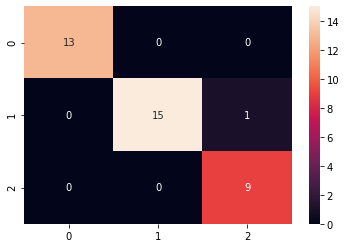

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

accuracy_score(y_test, y_pred)

### 10.Visualizing the Trained Model 

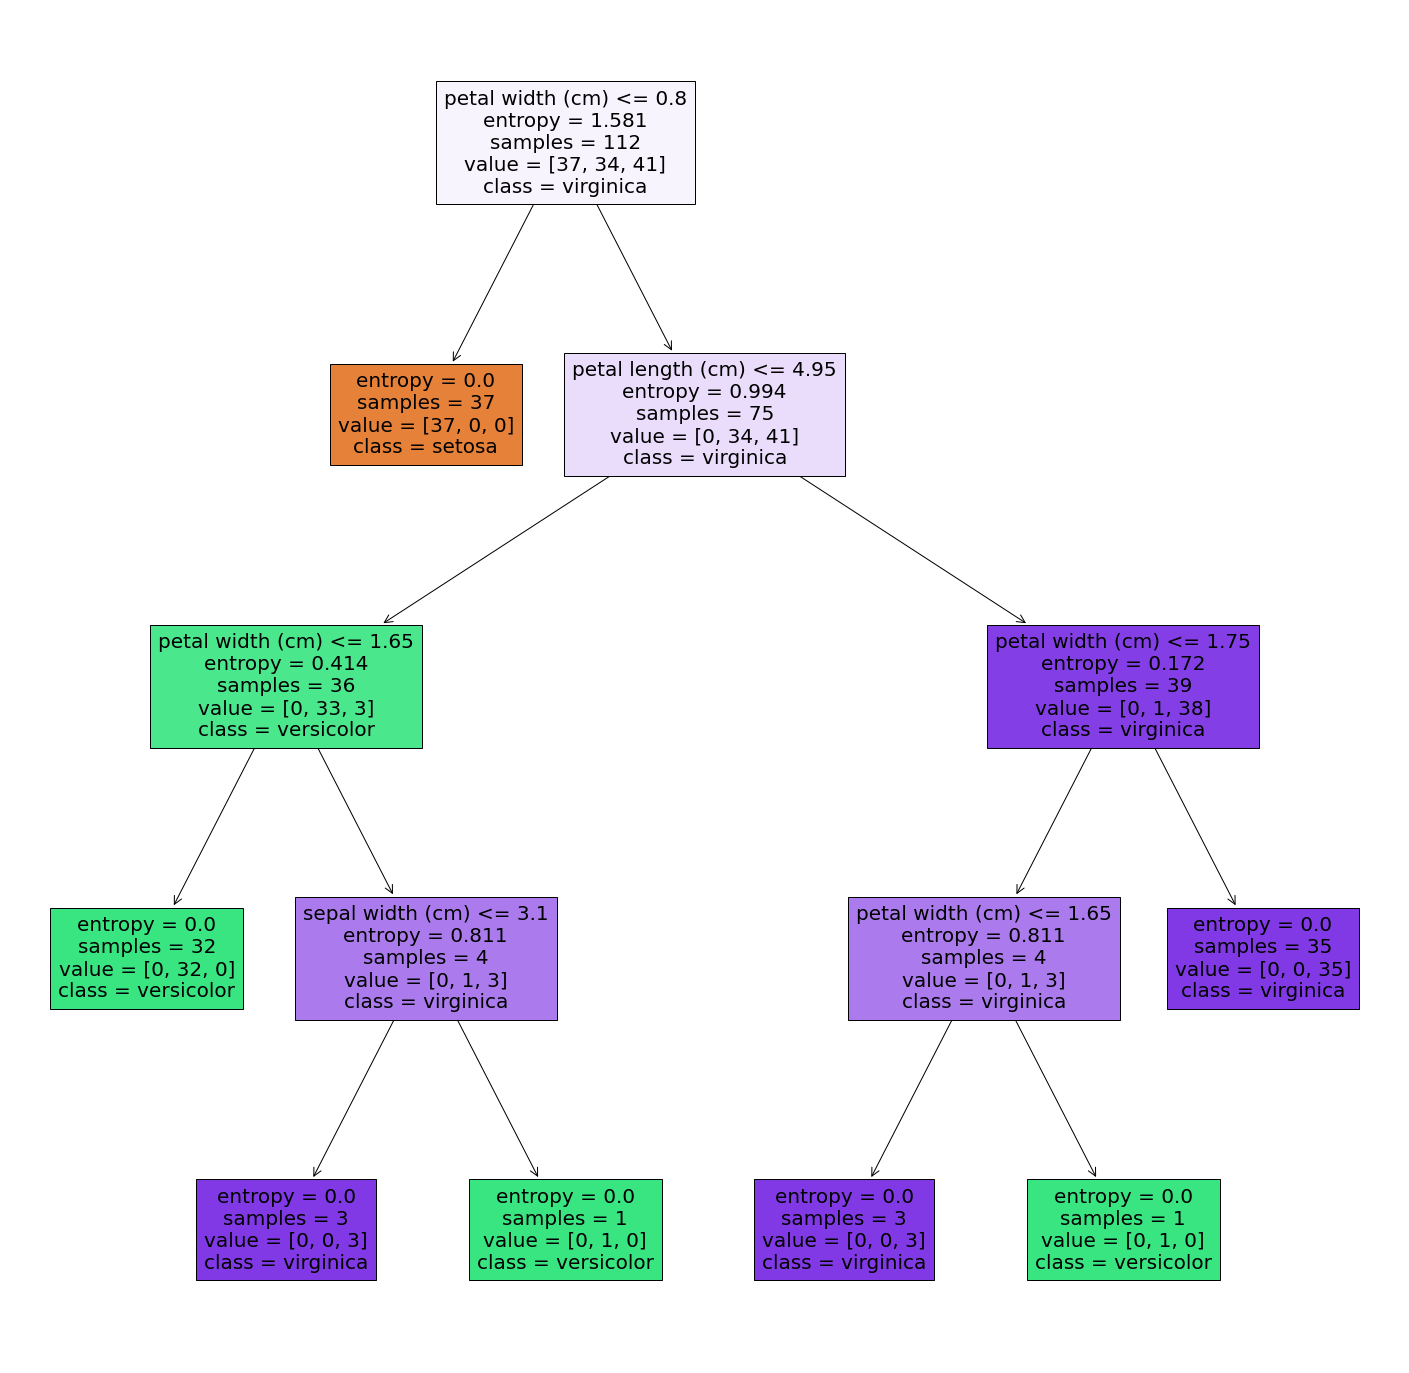

In [23]:
from sklearn import tree
plt.figure(figsize=(25,25))
fig1 = tree.plot_tree(tree_classifier,
                      feature_names=iris.feature_names,
                      class_names=iris.target_names,
                      filled=True
                      
)

### 11.Predicting the class output for some random values of petal and sepal length and width

In [24]:
print("Class Names = ",iris.target_names)

# Estimating class probabilities
print()
print("Estimating Class Probabilities for flower whose petals length width are 4.7cm and 3.2cm and sepal length and width are 1.3cm and 0.2cm. ")
print()
print('Output = ',tree_classifier.predict([[4.7, 3.2, 1.3, 0.2]]))
print()
print("Our model predicts the class as 0, that is, setosa.")

Class Names =  ['setosa' 'versicolor' 'virginica']

Estimating Class Probabilities for flower whose petals length width are 4.7cm and 3.2cm and sepal length and width are 1.3cm and 0.2cm. 

Output =  [0]

Our model predicts the class as 0, that is, setosa.


### 12. Calculating the Model accuracy 

In [26]:
print("Accuracy:",sm.accuracy_score(y_test, y_pred))

Accuracy: 0.9736842105263158


### Conclusion

#### I was able to successfully carry-out prediction using Prediction using Decision Tree Algorithm and was also able to evaluate the model's accuracy score, which came out to be 0.97368 

# THANK YOU!